## Calibrate using lab salinities

Calibration date: January 17th 2019

Standard solution similar to max salinities we will have in the lab

Script settings: 'mac', portnum= 3

|Parameter|Value|
|::|::|
|Lab temperature|20 $^{\circ}$C|
|nsamples|500 to 1000|
|channel|1|
|probe|37|
 

Variables:

|variable name| type and shape|
|::|::|
|'ch1':| float, array(nsamples)|
|'ch2': |float, array(nsamples)|
|'ch3': |float, array(nsamples)|
|'ch4': |float, array(nsamples)|
|'dt': |float, scalar|
|'macORpc': |str ('mac')|
|'nSample': |float, scalar|
|'nSamples': |float, scalar|
|'portNumber':| int, scalar|
|'pp':| float, array, not sure what it has|
|'time':| float, array(nsamples)|
|'timeElapsed':| float,scalar|

In [2]:
import os
import glob
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import scipy.io as sio
import warnings
warnings.filterwarnings("ignore")

In [3]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

../probe37_17jan19/010pcnt.mat
../probe37_17jan19/010pcnt.mat
../probe37_17jan19/020pcnt.mat
../probe37_17jan19/020pcnt.mat
../probe37_17jan19/025pcnt.mat
../probe37_17jan19/025pcnt.mat
../probe37_17jan19/035pcnt.mat
../probe37_17jan19/035pcnt.mat
../probe37_17jan19/040pcnt.mat
../probe37_17jan19/040pcnt.mat
../probe37_17jan19/050pcnt.mat
../probe37_17jan19/050pcnt.mat
../probe37_17jan19/060pcnt.mat
../probe37_17jan19/060pcnt.mat
../probe37_17jan19/065pcnt.mat
../probe37_17jan19/065pcnt.mat
../probe37_17jan19/075pcnt.mat
../probe37_17jan19/075pcnt.mat
../probe37_17jan19/080pcnt.mat
../probe37_17jan19/080pcnt.mat
../probe37_17jan19/100pcnt.mat
../probe37_17jan19/100pcnt.mat


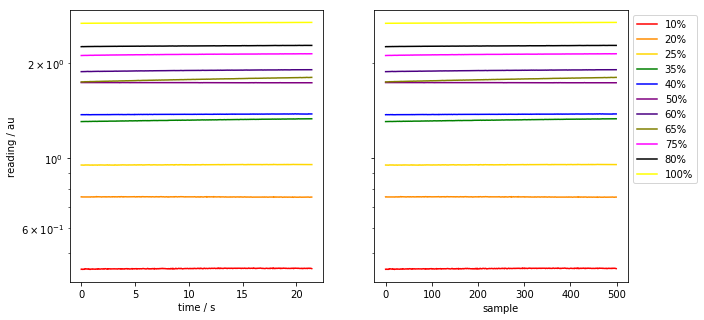

In [5]:
colors = ['red','darkorange','gold','green','blue', 'purple','indigo', 'olive', 'magenta', 'black','yellow']
dens = np.array([1.00272,1.00718, 1.007885,1.015236,1.01594,1.018755,1.02757,1.02763, 1.03092, 1.039009, 1.041493])
labels = np.array(['10%', '20%', '25%','35%','40%', '50%','60%','65%', '75%', '80%','100%'])
file_num = len(dens)


mean_read = np.zeros(file_num)
std_read = np.zeros(file_num)

fig, (ax0, ax1) = plt.subplots(1,2, figsize=(10,5), sharey=True)

for filepath, ii, col, lab in zip(glob.iglob('../probe37_17jan19/*.mat'), 
                                  range(file_num), colors, labels):
    print(filepath)
    mat = sio.loadmat(filepath, squeeze_me=True)
    ch1 = mat['ch1']
    time = mat['time']
    nsamples = mat['nSamples']
    
    mean_read[ii] = np.mean(ch1)
    std_read[ii] = np.std(ch1)
    
    ax0.plot(time,ch1, color=col)
    ax1.plot(np.arange(nsamples),ch1, label=lab, color=col)

    print(filepath)

ax1.legend(bbox_to_anchor=(1,1))
ax0.set_ylabel('reading / au')
ax0.set_xlabel('time / s')
ax1.set_xlabel('sample')
ax0.set_yscale('log')

0.4474 +/-  0.0010
0.7548 +/-  0.0008
0.9546 +/-  0.0014
1.3230 +/-  0.0078
1.3800 +/-  0.0023
1.7384 +/-  0.0009
1.8999 +/-  0.0075
1.7797 +/-  0.0165
2.1368 +/-  0.0072
2.2733 +/-  0.0055
2.6909 +/-  0.0048


Text(0.5,0,'density / g cm$^{-3}$')

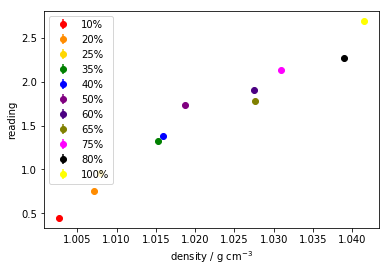

In [7]:
fig, (ax0) = plt.subplots(1,1, figsize=(6,4), sharey = True)
for ii in range(file_num):
    ax0.errorbar(dens[ii],mean_read[ii],yerr=std_read[ii], 
                 fmt='o',color=colors[ii], label=labels[ii])
    print('%1.4f +/- % 1.4f' %(mean_read[ii], std_read[ii]))
    
ax0.legend(loc=2)
ax0.set_ylabel('reading')
ax0.set_xlabel('density / g cm$^{-3}$')
